In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

import pyhf

print("pyhf version: ", pyhf.__version__)

pyhf version:  0.5.4


# Fitting Procedure

* Heavy–quark Yukawa couplings to the light (heavy) CP–even Higgs bosons for type II 2HDM.

Correction            |           Type II             | 
----------------------|:-----------------------------:|
1+ $\Delta^{h^0}_t$   | $\frac{\cos\alpha}{\sin\beta}$  |  
1+ $\Delta^{h^0}_b$   | $-\frac{\sin\alpha}{\cos\beta}$ |  
1+ $\Delta^{H^0}_t$   | $\frac{\sin\alpha}{\sin\beta}$  |  
1+ $\Delta^{H^0}_b$   | $\frac{\cos\alpha}{\cos\beta}$  |  

* Triple Higgs self–interactions involving the neutral CP–even Higgs fields in the 2HDM.

$$\lambda_{h^0h^0H^0} = \frac{\cos(\beta-\alpha)}{\sin2\beta}\left[\sin2\alpha(2m^2_{h^0}+m^2_{H^0})-\frac{2M_{12}^2}{\sin2\beta}(3\sin2\alpha-\sin2\beta) \right]$$

* The cross section is propotional to amplitude square: 

$$\sigma \propto|\mathcal{A}(pp\to H \to hh \to b\bar{b}b\bar{b})|^2 \propto $$

$$\left|\left[ (1+ \Delta^{H^0}_t)\times\lambda_{h^0h^0H^0}\times(1+ \Delta^{h^0}_b)^2 \right] + \left[(1+ \Delta^{H^0}_b)\times\lambda_{h^0h^0H^0}\times(1+ \Delta^{h^0}_b)^2\right] \right|^2 =$$

$$\left| \left[ (1+ \Delta^{H^0}_t)+(1+ \Delta^{H^0}_b)\right]\times\lambda_{h^0h^0H^0}\times(1+ \Delta^{h^0}_b)^2  \right|^2$$

* The relation between upper limit for number of signal and  number of survival Monte Carlo signal samples at benchmark point can be written in

$$\frac{N^{sig}_{\text{limit}}}{N^{sig}_{\text{MC}}}= \frac{|\mathcal{A}(pp\to H \to hh \to b\bar{b}b\bar{b})|^2(\cos(\beta-\alpha),M_{12}^2)}{|\mathcal{A}(pp\to H \to hh \to b\bar{b}b\bar{b})|^2_{\tan\beta=5,M_{12}^2=400000,\cos(\beta-\alpha)=0.08}}$$


* Our benchmark point is at $\tan\beta$=5, $M_{12}^2$=400000$\text{GeV}^2$, $\cos(\beta-\alpha)$=0.08, $M_H=M_A=M_{H^{\pm}}$=1000GeV, $M_h$=125GeV

* $N^{sig}_{\text{limit}}$ is the function of $\cos(\beta-\alpha)$ and $M_{12}^2$.

$$N^{sig}_{\text{limit}}= \frac{|\mathcal{A}(pp\to H \to hh \to b\bar{b}b\bar{b})|^2(\cos(\beta-\alpha),M_{12}^2)}{|\mathcal{A}(pp\to H \to hh \to b\bar{b}b\bar{b})|^2_{\tan\theta=5,M_{12}^2=400000,\cos(\beta-\alpha)=0.08}}\times N^{sig}_{\text{MC}}$$

* $N^{sig}_{\text{MC}}$, $N^{bkg}_{\text{MC}}$ can be obtained after we apply ML classifier.


* Treat $N^{sig}_{\text{MC}}$, $N^{bkg}_{\text{MC}}$ as 1 bin case and use CLs method to get expected signal strengths in $2\sigma$ and $1\sigma$ bands at 95%C.L.

* Translate expected signal strengths to be number of signal events in $2\sigma$ and $1\sigma$ bands at 95%C.L.
$$1\sigma\,\, \text{band} = [s_{-1\sigma}\times N^{sig}_{\text{MC}},s_{1\sigma}\times N^{sig}_{\text{MC}}]$$
$$2\sigma\,\, \text{band} = [s_{-2\sigma}\times N^{sig}_{\text{MC}},s_{2\sigma}\times N^{sig}_{\text{MC}}]$$

* After scan $\cos(\beta-\alpha)$ and $M_{12}^2$, we can pick allowed sets which let $N^{sig}_{\text{limit}}$ in the $1\sigma\,\, \text{band}$ or $2\sigma\,\, \text{band}$ regions.


Ref: [Higgs pair production via gluon fusion in the Two-Higgs-Doublet Model](https://arxiv.org/abs/1407.0281)  
Ref: [Exploring sizable triple Higgs couplings in the 2HDM](https://arxiv.org/abs/2005.10576)  
Ref: [LHC Search of New Higgs Boson via Resonant Di-Higgs Production with Decays into 4W](https://arxiv.org/abs/1706.05980)

## Couplings in 2HDM Type II

In [14]:
"""
Convertion:
0 ≤ \beta - \alpha ≤ 𝜋


0 < \beta <  𝜋/2
"""


"""
lambda_Hhh(cb_a, m12s, tb, mH, mh=125 )
"""

def lambda_Hhh(cb_a, m12s, tb, mH, mh=125 ):
    b_a = np.arccos(cb_a)
    b = np.arctan(tb)
    a = np.arctan(tb) - np.arccos(cb_a)
    
    ########################################################################
    """
    arXiv:2005.10576v2 Eq. (32)
    """
    
    part_a = (2*mh**2+mH**2-4*(m12s/(np.sin(b)*np.cos(b))))*np.sin(b_a)**2
    part_b = 2*1/np.tan(2*b)*(2*mh**2+mH**2-3*(m12s/(np.sin(b)*np.cos(b))))*np.sin(b_a)*cb_a
    part_c = (2*mh**2+mH**2-2*(m12s/(np.sin(b)*np.cos(b))))*cb_a**2

    return -1*cb_a/246*(part_a+part_b-part_c)
    ########################################################################
    
    
    
"""
gHt(cb_a, tb)
"""
def gHt(cb_a, tb):
    b_a = np.arccos(cb_a)
    b = np.arctan(tb)
    a = np.arctan(tb) - np.arccos(cb_a)
    
    return np.sin(a)/np.sin(b)

    
"""
gHb(cb_a, tb)
"""
def gHb(cb_a, tb):
    b_a = np.arccos(cb_a)
    b = np.arctan(tb)
    a = np.arctan(tb) - np.arccos(cb_a)
    
    return np.cos(a)/np.cos(b)
    

"""
ght(cb_a, tb)
"""
def ght(cb_a, tb):
    b_a = np.arccos(cb_a)
    b = np.arctan(tb)
    a = np.arctan(tb) - np.arccos(cb_a)
    
    return np.cos(a)/np.sin(b)

    
"""
ghb(cb_a, tb)
"""
def ghb(cb_a, tb):
    b_a = np.arccos(cb_a)
    b = np.arctan(tb)
    a = np.arctan(tb) - np.arccos(cb_a)
    
    return -1*np.sin(a)/np.cos(b)
    
    
    
"""
Constraint(cb_a, m12s, tb, mH, mh=125, luminosity = 3000, acceptance = 0.5, Xection = 0.01)

luminosity (fb^-1)
Xection (pd)

m_h:    125.00000
m_H:   1000.00000
m_A:   1001.00000
m_H+:   1001.00000
sin(b-a):      0.99612
lambda_6:      0.00000
lambda_7:      0.00000
m12^2: 400000.00000
tan(beta):      5.00000  (fix)


np.arctan(5) - 𝜋  ≤ \alpha ≤  np.arctan(5)

"""    
    
def Constraint_N(cb_a, m12s, tb, mH, mh=125, luminosity = 3000, acceptance = 0.5, Xection = 0.01):
    
    N_MC = luminosity*acceptance*(Xection*1000)
    
    numerator = ((1+gHt(cb_a, tb)) + (1+gHb(cb_a, tb)))**2 * (lambda_Hhh(cb_a, m12s, tb, mH, mh=125 )**2) * (1+ghb(cb_a, tb))**4
    
    cba = np.cos(np.arcsin(0.99612))
    denominator =  ((1+gHt(cba, 5)) + (1+gHb(cba, 5)))**2 * (lambda_Hhh(cba, 400000, 5, 1000, mh=125 )**2) * (1+ghb(cba, 5))**4
    
    return N_MC*(numerator/denominator) #

In [4]:
%time
time.sleep(1)
start = time.time()

dictionary = {
              "sig_Xection" : 0.00081186,
              "sig_Branching_ratio" : 0.8*0.6*0.6,
              "sig_acceptance" : 0.8**2*0.5,
              "bkg_Xection" : 0.277353172,
              "bkg_acceptance" : 0.34951133357621456**2*0.1,
              "luminosity": 3000
              }
    
    
n_H = dictionary["sig_Xection"]*dictionary["sig_Branching_ratio"]*dictionary["sig_acceptance"]*dictionary["luminosity"]*1000  
n_QCD = dictionary["bkg_Xection"]*dictionary["bkg_acceptance"]*dictionary["luminosity"]*1000

print("# of H survival: {}".format(n_H))
print("# of QCD survival: {}".format(n_QCD))

n_slice = 300
cb_a = np.linspace(-1 , 1,  n_slice)
m12_s = np.linspace(100000 , 1000000,  n_slice)

cba = []
m12s = []

for element in tqdm(cb_a):
    for j in range(len(m12_s)):
        cba.append(element)
        m12s.append(m12_s[j])

cba = np.array(cba)
m12s = np.array(m12s)   
tb = np.full(n_slice*n_slice, 5)
mH = np.full(n_slice*n_slice, 1000)
mh = np.full(n_slice*n_slice, 125)
luminosity = np.full(n_slice*n_slice, dictionary["luminosity"])
acceptance = np.full(n_slice*n_slice, dictionary["sig_acceptance"])
Xection = np.full(n_slice*n_slice, dictionary["sig_Xection"]*dictionary["sig_Branching_ratio"])

constraint_n = np.vectorize(Constraint_N)(cba, m12s, tb, mH, mh, luminosity, acceptance, Xection)
# print(constraint_n)

finish = time.time()
print("Total TIme: {} min".format((finish-start)/60))


CPU times: user 2 µs, sys: 3 µs, total: 5 µs
Wall time: 12.2 µs


100%|██████████| 300/300 [00:00<00:00, 8549.92it/s]

# of H survival: 224.46305280000004
# of QCD survival: 10164.286971790481


Total TIme: 0.20891814629236857 min


# Upper Limit of Signal Strength by CLs Method

Ref :[pyhf.infer.intervals.upperlimit](https://scikit-hep.org/pyhf/_generated/pyhf.infer.intervals.upperlimit.html?highlight=limit#pyhf.infer.intervals.upperlimit)


In [5]:
model = pyhf.simplemodels.hepdata_like(
    signal_data=[n_H], bkg_data=[n_QCD], bkg_uncerts=[np.sqrt(n_QCD)]
    
)
# print(model)

# print("Explore model")
# print(f"  channels: {model.config.channels}")
# print(f"     nbins: {model.config.channel_nbins}")
# print(f"   samples: {model.config.samples}")
# print(f" modifiers: {model.config.modifiers}")
# print(f"parameters: {model.config.parameters}")
# print(f"  nauxdata: {model.config.nauxdata}")
# print(f"   auxdata: {model.config.auxdata}")

# print("Expected data: ", model.expected_data([1.0, 1.0]))
# print("Expected actualdata: ", model.expected_actualdata([1.0, 1.0]))
# print("Expected auxdata: ", model.expected_auxdata([1.0, 1.0, 0.0]))

# init_pars = model.config.suggested_init()
# bounds = model.config.suggested_bounds()
# print("init_pars: ", init_pars)
# print("bounds: ", bounds)
# print("the index of the parameter: ", model.config.poi_index)

observations = [n_QCD] + model.config.auxdata  # this is a common pattern!
print("observations: ", observations)


scan = np.linspace(0, 5, 101)

obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upperlimit(
                                                                        observations, 
                                                                        model, 
                                                                        scan, 
                                                                        return_results=True
                                                                        )


print("CLs: {:.3f}".format(obs_limit))
print("CLexp: {:.4f}, −2σ: {:.4f}, −1σ: {:.4f}, 0σ: {:.4f}, 1σ: {:.4f}, 2σ: {:.4f} ".format(obs_limit,exp_limits[0],exp_limits[1],exp_limits[2],exp_limits[3],exp_limits[4]))

observations:  [10164.286971790481, 10164.28697179048]


/dicos_ui_home/alanchung/.local/lib/python3.6/site-packages/pyhf/infer/calculators.py:229: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


CLs: 1.245
CLexp: 1.2454, −2σ: 0.6695, −1σ: 0.8972, 0σ: 1.2454, 1σ: 1.7332, 2σ: 2.3235 


In [6]:

# mu_test = 1.2454
# CLs_asy, CL_asy, expected_asy, expected_set_asy = pyhf.infer.hypotest(
#                                 mu_test, 
#                                 observations, 
#                                 model, 
#                                 return_tail_probs=True,  #returning CLs and [CL_s+b, CL_b]
#                                 return_expected = True, # returning CLexp
#                                 return_expected_set=True, #returning (−2,−1,0,1,2)\sigma CLexp
#                                 test_stat="qtilde", # 
#                                 calctype="asymptotics" #default
#                             )

# print("CLs: {:.3f}, CL_sb: {:.3f}, CL_b: {:.3f} ".format(CLs_asy, CL_asy[0], CL_asy[1]))
# print("CLexp: {:.4f}, −2σ: {:.4f}, −1σ: {:.4f}, 0σ: {:.4f}, 1σ: {:.4f}, 2σ: {:.4f} ".format(expected_asy,expected_set_asy[0],expected_set_asy[1],expected_set_asy[2],expected_set_asy[3],expected_set_asy[4]))


# Pick Allowed Parameter sets

In [7]:
%time

Limit = {"−2sigma": exp_limits[0],
         "−1sigma": exp_limits[1], 
         "expected": exp_limits[2],
         "1sigma": exp_limits[3], 
         "2sigma": exp_limits[4]
        }

"""
1σ
"""
n_low_1 = n_H*Limit["−1sigma"]
n_high_1 = n_H*Limit["1sigma"]

"2σ"
n_low_2 = n_H*Limit["−2sigma"]
n_high_2 = n_H*Limit["2sigma"]


constraint_alowed_1 = np.where(constraint_n > n_low_1, constraint_n, 0 )
constraint_alowed_1 = np.where(constraint_alowed_1 < n_high_1, constraint_alowed_1, 0 )
allowed_region_1 = np.where(constraint_alowed_1 != 0)[0]


constraint_alowed_2 = np.where(constraint_n > n_low_2, constraint_n, 0 )
constraint_alowed_2 = np.where(constraint_alowed_2 < n_high_2, constraint_alowed_2, 0 )
allowed_region_2 = np.where(constraint_alowed_2 != 0)[0]

print("len(allowed_region_1)", len(allowed_region_1))
print("len(allowed_region_2)", len(allowed_region_2))

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 13.6 µs
len(allowed_region_1) 2545
len(allowed_region_2) 4763


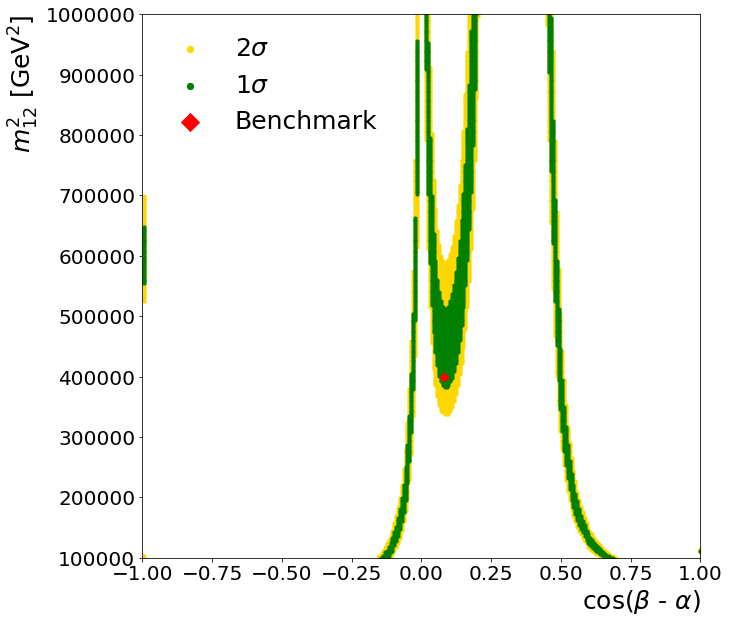

In [8]:
fig, ax = plt.subplots(1,1, figsize=(10,10))



plt.scatter(cba[allowed_region_2],m12s[allowed_region_2], marker=".", s=40 , c='gold', label = "2$\sigma$")
plt.scatter(cba[allowed_region_1],m12s[allowed_region_1], marker=".", s=40 , c='green', label = "1$\sigma$")
plt.scatter(0.08,400000, marker="D", s=40 , c='red', label = "Benchmark")



plt.xlim((-1,1))
# plt.xlim((0.,0.09))
plt.ylim((100000,1000000))

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.xlabel("cos($\\beta$ - $\\alpha$)", fontsize=25,horizontalalignment='right',x=1)
plt.ylabel('$m_{12}^2$ [$\mathrm{GeV}^2$]', fontsize=25,horizontalalignment='right',y=1)
plt.legend(ncol=1, fontsize=25, markerscale=2., scatterpoints=1,
           edgecolor = "w",fancybox=False, framealpha=0) #bbox_to_anchor=(0.7, 0.1),
plt.ticklabel_format(style='plain')
# plt.grid()
# plt.savefig("./Higgs_Pt/Comparison_ROC.pdf", transparent=True)
# plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()